<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Regression/Regression_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Data

This file contains the top 30 components of the S&P, TLT, IWM, and MDY.  There is 5 years worth of data.  The final date is 1-25-2021.  

<br>
</br>

![Data](https://drive.google.com/uc?export=view&id=1h5RvP6sgBILs19PczE4Pw31SAUfSicu1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# start by reading a set of sample data from github. This data is related to mall visitors
#we are reading a json file
filename = "https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data/S%26P%20Weighting.csv"
df = pd.read_csv(filename)

df.drop('Date',1,inplace=True)
df.head()

,S&P,AAPL,MSFT,AMZN,FB,TSLA,GOOG-A,GOOG-C,BRK-B,JNJ,JPM,V,NVDA,UNH,NFLX,PG,DIS,HD,PYPL,MA,BAC,VZ,INTC,ADBE,CMCSA,CRM,T,MRK,TMO,PFE,WMT,MDY,IWM,TLT
0,1877.079956,24.860001,51.790001,596.530029,97.010002,39.276001,733.619995,711.669983,124.129997,96.400002,55.660000,71.739998,28.420000,113.379997,99.120003,76.849998,95.290001,121.709999,31.469999,86.769997,12.96,47.029999,29.600000,86.769997,27.105000,69.919998,35.000000,50.919998,134.729996,28.937382,63.450001,229.479996,99.120003,126.019997
1,1903.630005,24.997499,52.169998,601.250000,97.339996,38.712002,733.789978,713.039978,125.889999,101.180000,57.080002,71.879997,28.700001,113.959999,97.830002,78.809998,96.269997,122.199997,31.969999,87.000000,13.31,48.250000,29.940001,86.889999,27.420000,69.870003,35.400002,51.450001,134.100006,29.098671,64.000000,234.619995,101.099998,126.080002
2,1882.949951,23.355000,51.220001,583.349976,94.449997,37.613998,717.580017,699.989990,125.190002,102.160004,57.040001,70.910004,28.360001,112.330002,91.150002,78.800003,94.320000,121.570000,31.590000,84.809998,13.36,49.029999,29.809999,84.849998,27.059999,67.430000,35.480000,50.369999,135.830002,28.956356,63.950001,232.250000,99.709999,126.050003
3,1893.359985,23.522499,52.060001,635.349976,109.110001,37.939999,748.299988,730.960022,126.010002,102.269997,57.279999,69.330002,28.049999,111.379997,94.410004,79.820000,93.529999,122.279999,34.240002,83.430000,13.53,49.009998,29.969999,84.519997,27.055000,65.690002,35.529999,49.200001,128.169998,28.652752,64.220001,232.339996,99.690002,126.230003
4,1940.239990,24.334999,55.090000,587.000000,112.209999,38.240002,761.349976,742.950012,129.770004,104.440002,59.500000,74.489998,29.290001,115.160004,91.839996,81.690002,95.820000,125.760002,36.139999,89.029999,14.14,49.970001,31.020000,89.129997,27.855000,68.059998,36.060001,50.669998,132.059998,28.927895,66.360001,239.970001,102.959999,127.300003


In [ ]:
df.describe()

,S&P,AAPL,MSFT,AMZN,FB,TSLA,GOOG-A,GOOG-C,BRK-B,JNJ,JPM,V,NVDA,UNH,NFLX,PG,DIS,HD,PYPL,MA,BAC,VZ,INTC,ADBE,CMCSA,CRM,T,MRK,TMO,PFE,WMT,MDY,IWM,TLT
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,2705.576757,52.920741,112.282200,1585.848085,174.152851,111.468850,1111.054639,1101.966294,188.320906,132.129905,98.586640,135.386291,206.994639,226.912232,277.246203,99.554861,114.756950,187.738944,91.060604,199.057181,25.335552,53.654313,45.559666,238.800691,38.446231,132.308038,35.177570,69.761859,245.013646,34.779267,96.748205,328.707077,145.475330,133.413820
std,432.948236,27.133070,51.355412,757.916164,44.591913,142.436676,268.041893,275.989173,27.105334,12.405076,20.229266,44.550602,131.190785,61.219497,131.788833,19.418204,17.835465,45.402558,49.660583,82.656421,5.822943,4.593118,9.280901,118.252124,5.193771,49.698253,4.308152,11.202406,94.007469,3.575406,23.353108,38.867053,19.897197,15.605612
min,1829.079956,22.584999,48.430000,482.070007,94.449997,28.733999,681.140015,668.260010,124.129997,96.400002,53.070000,67.769997,25.219999,110.019997,82.790001,70.940002,85.760002,111.849998,31.469999,80.650002,11.160000,42.889999,28.219999,73.849998,27.055000,54.049999,26.500000,48.590000,121.940002,27.030361,63.150002,220.850006,94.790001,112.000000
25%,2379.814941,35.919998,67.505001,908.450012,139.615005,48.269998,883.885010,867.244995,166.944999,123.549999,87.110000,91.240002,111.250000,171.489998,147.430001,84.274998,101.440002,148.035004,44.340000,115.914997,22.945001,49.674999,36.239999,132.839996,34.485001,84.974998,31.064999,61.130001,160.605004,32.101518,74.540001,307.270004,135.320007,121.254998
50%,2722.179932,44.259998,102.050003,1626.229980,172.449997,62.043999,1095.500000,1090.880005,196.240005,132.289993,101.199997,134.740005,183.009995,236.699997,294.339996,91.070000,110.410004,184.979996,83.889999,196.520004,26.389999,53.930000,46.869999,240.559998,37.959999,134.679993,35.990002,66.000000,219.419998,34.373814,95.040001,336.769989,149.110001,127.459999
75%,2951.234986,59.546252,140.375000,1892.815002,193.269997,72.283001,1242.645019,1239.265015,208.720001,141.099998,112.744999,177.315002,249.495003,267.500000,364.180008,117.140000,125.405003,217.675003,108.765000,274.020005,29.580000,57.585001,51.965001,298.829987,42.524999,159.010002,38.575001,80.665001,293.750000,36.806330,115.884998,354.595001,157.044998,140.044998
max,3853.070068,139.070007,231.649994,3531.449951,303.910004,880.020020,1892.560059,1901.050049,235.020004,163.550003,141.169998,218.729996,582.479980,365.029999,586.340027,144.490005,181.179993,291.929993,252.000000,366.119995,35.639999,62.070000,68.470001,533.799988,52.400002,281.250000,43.470001,92.040001,527.659973,43.861481,152.789993,449.790009,215.000000,171.570007


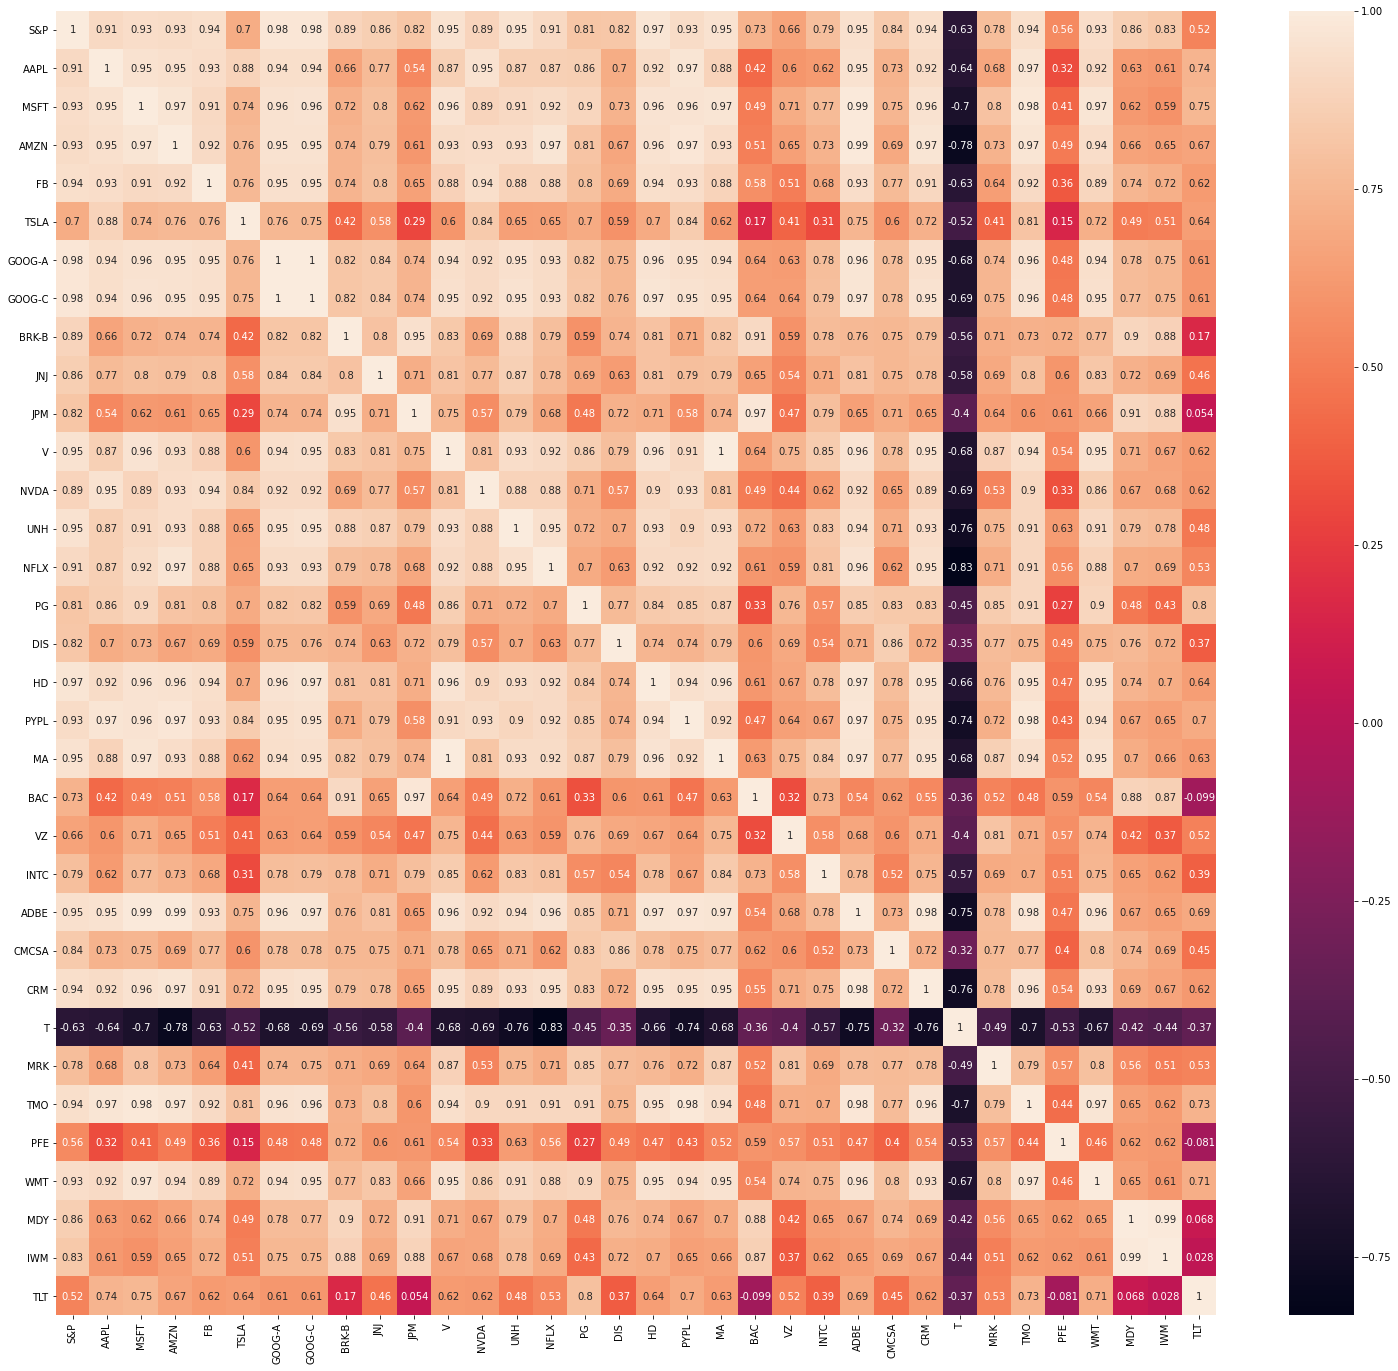

In [ ]:
stock_corr = df.corr()
fig, ax = plt.subplots(figsize = (26, 24))
sns.heatmap(stock_corr, annot=True)

In [ ]:
X = df.drop('S&P',1)
Y = df['S&P']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def regressionFunc(X,Y):
  X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
  
  #set up the regression
  lm = LinearRegression()
  lm.fit(X_train, y_train)

  #let's now see how it performs on test data
  y_pred = lm.predict(x_test)

  #find the r-sqaure by testing on the training data
  r2 = r2_score(y_test,y_pred)
  print("R-square: ", r2)

In [ ]:
regressionFunc(X,Y)

R-square:  0.9994289136194814


#Feature Selection Comparison

We will use several different methods (kbest, rfe, backward elimination, and lasso method) to find the top five most influential features for Price.  We will then compare these and pick the best to use.  

Each idea will be explained in its place.

###K-Best with an F-Regression

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. (Wiki)

The F-distribution is formed by the ratio of two independent chi-square variables divided by their respective degrees of freedom. Since F is formed by chi-square, many of the chi-square properties carry over to the F distribution.

* The F-values are all non-negative
* The distribution is non-symmetric
* The mean is approximately 1
* There are two independent degrees of freedom, one for the numerator, and one for the denominator.
* There are many different F distributions, one for each pair of degrees of freedom.

The F-test is designed to test if two population variances are equal. It does this by comparing the ratio of two variances. So, if the variances are equal, the ratio of the variances will be 1. ([link](https://people.richland.edu/james/lecture/m170/ch13-f.html))

In general, one would expect that p-values are used to find features that are significantly better, but it seems the scikit-learn implementation is effectively the same as just choosing the best k cases in a regression analysis of each variable against our target.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = Y
features = X
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", df.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['S&P', 'AAPL', 'MSFT', 'AMZN', 'FB', 'TSLA', 'GOOG-A', 'GOOG-C',
       'BRK-B', 'JNJ', 'JPM', 'V', 'NVDA', 'UNH', 'NFLX', 'PG', 'DIS', 'HD',
       'PYPL', 'MA', 'BAC', 'VZ', 'INTC', 'ADBE', 'CMCSA', 'CRM', 'T', 'MRK',
       'TMO', 'PFE', 'WMT', 'MDY', 'IWM', 'TLT'],
      dtype='object') 

Chosen features:  Index(['GOOG-A', 'GOOG-C', 'V', 'UNH', 'HD'], dtype='object') 



array([ 5934.93514112,  8083.92334563,  7831.61057571,  9011.814879  ,
        1241.16891703, 25318.26718025, 26456.44347532,  4809.19421356,
        3583.33671541,  2555.10809072, 11868.34318181,  4603.33332676,
       12510.05811627,  6114.01597188,  2475.86329405,  2607.05207194,
       17429.35586519,  7764.16362346, 11808.77619264,  1428.61652126,
         962.01842617,  2103.84972915, 10713.71722832,  3000.64976519,
        9442.57387833,   832.68218038,  1969.88689219,  8906.35178087,
         561.04633165,  8289.68366366,  3525.24007706,  2778.87117729,
         473.30213535])

In [ ]:
#see which feature is associated with which score
scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

   Feature Name         Score
6        GOOG-C  26456.443475
5        GOOG-A  25318.267180
16           HD  17429.355865
12          UNH  12510.058116
10            V  11868.343182
18           MA  11808.776193
22         ADBE  10713.717228
24          CRM   9442.573878
3            FB   9011.814879
27          TMO   8906.351781
29          WMT   8289.683664
1          MSFT   8083.923346
2          AMZN   7831.610576
17         PYPL   7764.163623
13         NFLX   6114.015972
0          AAPL   5934.935141
7         BRK-B   4809.194214
11         NVDA   4603.333327
8           JNJ   3583.336715
30          MDY   3525.240077
23        CMCSA   3000.649765
31          IWM   2778.871177
15          DIS   2607.052072
9           JPM   2555.108091
14           PG   2475.863294
21         INTC   2103.849729
26          MRK   1969.886892
19          BAC   1428.616521
4          TSLA   1241.168917
20           VZ    962.018426
25            T    832.682180
28          PFE    561.046332
32        

In [ ]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

   Chosen
0  GOOG-A
1  GOOG-C
2       V
3     UNH
4      HD


###RFE - Recursive Feature Elimination

RFE is a feature selection algorithm.  It is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method.  It is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.  At each stage of the search, the least important predictors are iteratively eliminated prior to rebuilding the model. ([link](https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=Recursive%20Feature%20Elimination%2C%20or%20RFE%20for%20short%2C%20is%20a%20feature,columns%2C%20like%20an%20excel%20spreadsheet.&text=Feature%20selection%20refers%20to%20techniques,(columns)%20for%20a%20dataset))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#to wrap on RFE
lr = LinearRegression()

#prune one feature on each iteration
#select 3
rfe = RFE(estimator = lr, n_features_to_select = 5, step = 1)

rfe.fit(features,target)

rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['AAPL', 'MSFT', 'BRK-B', 'MDY', 'IWM'], dtype='object')


In [ ]:
rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")

#output the entire list
print(rfe_output)

   Features  Rank
0      AAPL     1
1      MSFT     1
30      MDY     1
7     BRK-B     1
31      IWM     1
10        V     2
29      WMT     3
25        T     4
28      PFE     5
3        FB     6
8       JNJ     7
32      TLT     8
21     INTC     9
27      TMO    10
16       HD    11
18       MA    12
15      DIS    13
11     NVDA    14
14       PG    15
5    GOOG-A    16
20       VZ    17
13     NFLX    18
9       JPM    19
12      UNH    20
22     ADBE    21
24      CRM    22
19      BAC    23
26      MRK    24
17     PYPL    25
4      TSLA    26
6    GOOG-C    27
2      AMZN    28
23    CMCSA    29


###Forward and Backward Selection

Backward elimination process - [link](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4)

Forward elimination process - [link](https://towardsdatascience.com/using-forward-selection-to-filter-out-unnecessary-features-in-a-machine-learning-dataset-e36c62431781)

Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. [link](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/#:~:text=Forward%20Selection%3A%20Forward%20selection%20is,the%20performance%20of%20the%20model.)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

target = Y
features = X
feature_names = list(features.columns)

#backward selection
feature_selector = SequentialFeatureSelector(LinearRegression(),k_features =5, forward=False,scoring='neg_mean_squared_error',cv=4)

#this step is strange, but we are using features.values and target.values to convert the data to numpy in order to run
feature_filtered = feature_selector.fit(features.values, target.values)

#list which features are included
backward_features = list(feature_filtered.k_feature_names_)
print(backward_features, '\n')


original_features = pd.DataFrame({'Features' : features.columns})
print(original_features)

['1', '4', '8', '10', '30'] 

   Features
0      AAPL
1      MSFT
2      AMZN
3        FB
4      TSLA
5    GOOG-A
6    GOOG-C
7     BRK-B
8       JNJ
9       JPM
10        V
11     NVDA
12      UNH
13     NFLX
14       PG
15      DIS
16       HD
17     PYPL
18       MA
19      BAC
20       VZ
21     INTC
22     ADBE
23    CMCSA
24      CRM
25        T
26      MRK
27      TMO
28      PFE
29      WMT
30      MDY
31      IWM
32      TLT


In [ ]:
#get a list of the actual names 
#convert it to a dataFrame

backward_df = []

for k in backward_features:
  backward_df.append(original_features['Features'].loc[int(k)])

backward_df = pd.DataFrame({'Backward': backward_df})
print(backward_df)

  Backward
0     MSFT
1     TSLA
2      JNJ
3        V
4      MDY


###Lasso Regression

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.

By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.

This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors

In [ ]:
from sklearn.linear_model import Lasso

#1.0 is the strongest regularization
#the most important features are those far away from zero
lasso = Lasso(alpha=1.0).fit(features,target)

lasso_info = pd.DataFrame({'Features' :features.columns, 'LassoCoef':lasso.coef_}).sort_values(by='LassoCoef',ascending = False)

print(lasso_info)

   Features  LassoCoef
25        T   4.258080
30      MDY   4.017098
10        V   1.689163
1      MSFT   1.575942
7     BRK-B   1.418008
8       JNJ   1.394447
3        FB   0.808520
0      AAPL   0.726388
14       PG   0.591991
20       VZ   0.390833
16       HD   0.352258
15      DIS   0.304203
27      TMO   0.209475
28      PFE   0.184216
21     INTC   0.140899
11     NVDA   0.131796
4      TSLA   0.108640
5    GOOG-A   0.082247
18       MA   0.073332
6    GOOG-C   0.039495
2      AMZN   0.036197
24      CRM   0.032869
13     NFLX   0.032453
29      WMT   0.026621
19      BAC  -0.000000
9       JPM   0.000000
26      MRK  -0.000000
12      UNH  -0.033733
17     PYPL  -0.201731
22     ADBE  -0.238588
23    CMCSA  -0.475534
32      TLT  -0.678461
31      IWM  -2.286022


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102149.09086152693, tolerance: 23580.47721489006
  positive)


In [ ]:
#use the absolute values
lasso_info['LassoCoef'] = abs(lasso_info['LassoCoef'])
lasso_df = lasso_info.sort_values(by='LassoCoef',ascending=False)
print(lasso_df)

   Features  LassoCoef
25        T   4.258080
30      MDY   4.017098
31      IWM   2.286022
10        V   1.689163
1      MSFT   1.575942
7     BRK-B   1.418008
8       JNJ   1.394447
3        FB   0.808520
0      AAPL   0.726388
32      TLT   0.678461
14       PG   0.591991
23    CMCSA   0.475534
20       VZ   0.390833
16       HD   0.352258
15      DIS   0.304203
22     ADBE   0.238588
27      TMO   0.209475
17     PYPL   0.201731
28      PFE   0.184216
21     INTC   0.140899
11     NVDA   0.131796
4      TSLA   0.108640
5    GOOG-A   0.082247
18       MA   0.073332
6    GOOG-C   0.039495
2      AMZN   0.036197
12      UNH   0.033733
24      CRM   0.032869
13     NFLX   0.032453
29      WMT   0.026621
19      BAC   0.000000
9       JPM   0.000000
26      MRK   0.000000


In [ ]:
#get all the different tables of chosen options

univariate_analysis_df = pd.DataFrame({'Univariate' : features.columns[features_kbest]})
rfe_analysis_df = pd.DataFrame({'RFE' : rfe_output['Features'].head(5).values})
backward_analysis_df = backward_df
lasso_analysis_df = pd.DataFrame({'Lasso' : lasso_df['Features'].head(5).values})

selected = [univariate_analysis_df,rfe_analysis_df,backward_analysis_df, lasso_analysis_df]
final_df = pd.concat(selected, axis=1)

print(final_df)

  Univariate    RFE Backward Lasso
0     GOOG-A   AAPL     MSFT     T
1     GOOG-C   MSFT     TSLA   MDY
2          V    MDY      JNJ   IWM
3        UNH  BRK-B        V     V
4         HD    IWM      MDY  MSFT


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
  le = LinearRegression(normalize=True).fit(X_train,y_train)
  print(name)
  print('Training score:\t ', le.score(X_train,y_train))

  y_pred = le.predict(X_test)
  print('r2_score:\t ', r2_score(y_test,y_pred))

In [ ]:
#print out all the values
#reminder: features is still all the values outside of Price and target is Price

for k in final_df.columns:
  score(k,features[final_df[k].values],target)
  print()

Univariate
Training score:	  0.9661451256864085
r2_score:	  0.9720844649418183

RFE
Training score:	  0.9980454656506017
r2_score:	  0.9982820464169506

Backward
Training score:	  0.9962263969817227
r2_score:	  0.9964690984157438

Lasso
Training score:	  0.9959692292685801
r2_score:	  0.9964856784093253



In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree.fit(features, target)

predictors = features.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

TLT       0.000000
UNH       0.000000
CMCSA     0.000000
PFE       0.000000
CRM       0.000000
TMO       0.000000
T         0.000000
VZ        0.000000
GOOG-C    0.000005
MRK       0.000016
PYPL      0.000045
TSLA      0.000103
INTC      0.000106
NFLX      0.000134
BRK-B     0.000176
MSFT      0.000198
AMZN      0.000356
AAPL      0.000680
BAC       0.000775
PG        0.000967
FB        0.001043
V         0.001084
JNJ       0.001753
NVDA      0.002541
MDY       0.002809
DIS       0.003377
GOOG-A    0.003896
IWM       0.009637
JPM       0.013104
WMT       0.027021
ADBE      0.065350
MA        0.202339
HD        0.662484
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2)
    
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
    
print("Test_score : ", r2_score(y_test, y_pred))

Test_score :  0.9995216750530086


##MultiCollinearity

Multicollinearity occurs when two or more independent variables are highly correlated in a regression model.  It can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.  It may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

It may occur due to the original data set, new varaibles which were created during feature engineering, dummy variables which were created and relay the same information, or if we simply have insufficient data.


<br></br>
###Variance Inflation Factors

Variable Inflation Factors (VIF) determines the strength of the correlation between the independent variables. As the name implies, it determines how much the variance is inflated.  It is predicted by taking a variable and regressing it against every other variable. It represents how well the variable is explained by other independent variables.

The formula is 1/(1-r^2).  We do ANOVA analysis and then take the r^2 and plug it into the formula.  We do this for each variable.  The higher the value the more mulitcollinearity exists in the variable.

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#it seems, that the fellow who made VIF, felt there should be a 
#constant column in front, as such, we need to put one in (of all 1s)
X = add_constant(X)

#now that we are set up, we can use VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,2932.03,const
1,159.51,AAPL
2,485.63,MSFT
3,176.24,AMZN
4,38.90,FB
5,45.71,TSLA
6,8312.92,GOOG-A
7,9193.98,GOOG-C
8,75.94,BRK-B
9,11.84,JNJ


In [ ]:
vif_sorted = vif.sort_values('VIF Factor',ascending=False)
vif_sorted.head(10)

,VIF Factor,features
7,9193.980753,GOOG-C
6,8312.922835,GOOG-A
0,2932.031286,const
11,661.122392,V
19,561.221563,MA
2,485.625889,MSFT
23,475.255223,ADBE
31,417.442502,MDY
32,352.418922,IWM
10,185.154190,JPM


In [ ]:
#now drop the three highest VIFs
vif_fixed = df.drop(['GOOG-C','GOOG-A','V','MA','MSFT'],axis =1)
vif_fixed.head()

,S&P,AAPL,AMZN,FB,TSLA,BRK-B,JNJ,JPM,NVDA,UNH,NFLX,PG,DIS,HD,PYPL,BAC,VZ,INTC,ADBE,CMCSA,CRM,T,MRK,TMO,PFE,WMT,MDY,IWM,TLT
0,1877.079956,24.860001,596.530029,97.010002,39.276001,124.129997,96.400002,55.660000,28.420000,113.379997,99.120003,76.849998,95.290001,121.709999,31.469999,12.96,47.029999,29.600000,86.769997,27.105000,69.919998,35.000000,50.919998,134.729996,28.937382,63.450001,229.479996,99.120003,126.019997
1,1903.630005,24.997499,601.250000,97.339996,38.712002,125.889999,101.180000,57.080002,28.700001,113.959999,97.830002,78.809998,96.269997,122.199997,31.969999,13.31,48.250000,29.940001,86.889999,27.420000,69.870003,35.400002,51.450001,134.100006,29.098671,64.000000,234.619995,101.099998,126.080002
2,1882.949951,23.355000,583.349976,94.449997,37.613998,125.190002,102.160004,57.040001,28.360001,112.330002,91.150002,78.800003,94.320000,121.570000,31.590000,13.36,49.029999,29.809999,84.849998,27.059999,67.430000,35.480000,50.369999,135.830002,28.956356,63.950001,232.250000,99.709999,126.050003
3,1893.359985,23.522499,635.349976,109.110001,37.939999,126.010002,102.269997,57.279999,28.049999,111.379997,94.410004,79.820000,93.529999,122.279999,34.240002,13.53,49.009998,29.969999,84.519997,27.055000,65.690002,35.529999,49.200001,128.169998,28.652752,64.220001,232.339996,99.690002,126.230003
4,1940.239990,24.334999,587.000000,112.209999,38.240002,129.770004,104.440002,59.500000,29.290001,115.160004,91.839996,81.690002,95.820000,125.760002,36.139999,14.14,49.970001,31.020000,89.129997,27.855000,68.059998,36.060001,50.669998,132.059998,28.927895,66.360001,239.970001,102.959999,127.300003


#Analysis Employed

We extracted the features that the variance inflation factors suggested, and now we re-run our model, testing it for 3 stocks that can accurately model the S&P.

In [ ]:
def everything(X,Y, num):
  target = Y
  features = X
  feature_names = list(features.columns)

  #K_Best
  selection_kBest = SelectKBest(f_regression,k = num).fit(features,target)
  scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score',ascending=False)
  features_kbest = selection_kBest.get_support()
  univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})

  #RFE
  rfe = RFE(estimator = lr, n_features_to_select = num, step = 1)
  rfe.fit(features,target)
  rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")

  #Backward Elimination
  feature_selector = SequentialFeatureSelector(LinearRegression(),k_features =num, forward=False,scoring='neg_mean_squared_error',cv=4)
  feature_filtered = feature_selector.fit(features.values, target.values)
  backward_features = list(feature_filtered.k_feature_names_)
  original_features = pd.DataFrame({'Features' : features.columns})
  
  backward_df = []
  for k in backward_features:
    backward_df.append(original_features['Features'].loc[int(k)])

  backward_df = pd.DataFrame({'Backward': backward_df})

  #Lasso
  lasso = Lasso(alpha=1.0).fit(features,target)
  lasso_info = pd.DataFrame({'Features' :features.columns, 'LassoCoef':lasso.coef_}).sort_values(by='LassoCoef',ascending = False)
  lasso_info['LassoCoef'] = abs(lasso_info['LassoCoef'])
  lasso_df = lasso_info.sort_values(by='LassoCoef',ascending=False)

  #Everything together
  univariate_analysis_df = pd.DataFrame({'Univariate' : features.columns[features_kbest]})
  rfe_analysis_df = pd.DataFrame({'RFE' : rfe_output['Features'].head(num).values})
  backward_analysis_df = backward_df
  lasso_analysis_df = pd.DataFrame({'Lasso' : lasso_df['Features'].head(num).values})

  selected = [univariate_analysis_df,rfe_analysis_df,backward_analysis_df, lasso_analysis_df]
  final_df = pd.concat(selected, axis=1)

  print(final_df)

  for k in final_df.columns:
    score(k,features[final_df[k].values],target)
    

X = vif_fixed.drop('S&P',1)
Y = vif_fixed['S&P']
everything(X,Y,3)



  Univariate  RFE Backward Lasso
0        UNH  MDY    BRK-B   MDY
1         HD   VZ      TMO     T
2       ADBE  IWM      MDY  AAPL
Univariate
Training score:	  0.9576247072063594
r2_score:	  0.9560855750197295
RFE
Training score:	  0.8428936162685986
r2_score:	  0.8517483651014315
Backward
Training score:	  0.9888199747074856
r2_score:	  0.9839686542624012
Lasso
Training score:	  0.9642002570934803
r2_score:	  0.9630276699580187


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137349.04105121395, tolerance: 23580.47721489006
  positive)
